In [1]:
import pandas as pd

def read_test_result(filename):
    data = pd.read_csv(f"../large_prime_numbers/test_results/{filename}")

    digits = data["Digits"].to_list()
    N_values = list(map(int, data["N"].to_list()))
    factor = list(map(int, data["factor"].to_list()))
    durations = data["duration"].to_list()
    return digits, N_values, factor, durations

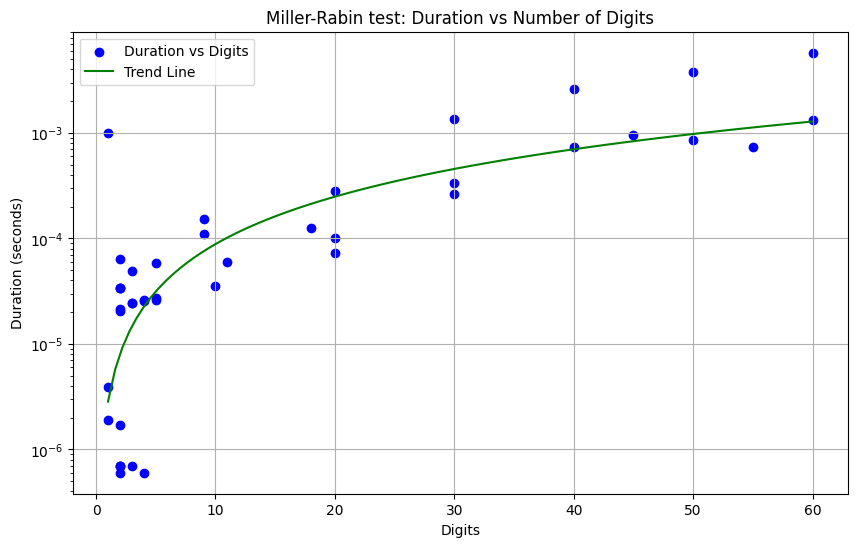

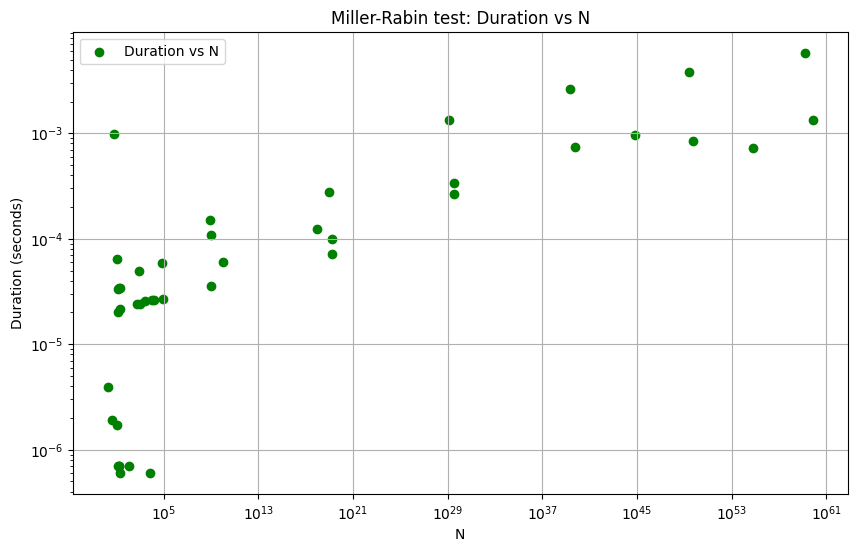

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#данные
digits, N_values, factors, durations = read_test_result("Miller-Rabin_23-09-2024 21-43-51.csv")

#график зависимости времени от количества цифр
plt.figure(figsize=(10, 6))
plt.scatter(digits, durations, color='b', label='Duration vs Digits')
plt.yscale('log')
plt.xlabel('Digits')
plt.ylabel('Duration (seconds)')
plt.title('Miller-Rabin test: Duration vs Number of Digits')
plt.grid(True)

z = np.polyfit(np.log(digits), np.log(durations), 1)
p = np.poly1d(z)
x_trend = np.linspace(min(digits), max(digits), 100)
y_trend = np.exp(p(np.log(x_trend)))
plt.plot(x_trend, y_trend, color='green', label='Trend Line')

plt.legend()
plt.show()

#график зависимости времени от значения N
plt.figure(figsize=(10, 6))
plt.scatter(N_values, durations, color='green', label='Duration vs N')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Duration (seconds)')
plt.title('Miller-Rabin test: Duration vs N')
plt.grid(True)
plt.legend()
plt.show()

